# Logistic Regression

![](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_regression_schematic.png)

## Overview

Logistic regression is a classification algorithm, used to estimate probabilities (Binary values like 0/1, yes/no, true/false) based on given set of independent variable(s). Its output values lies between 0 and 1. Prior to building a model, the features values are transformed using the logistic function (Sigmoid) to produce probability values that can be mapped to two or more classes.

## Linear vs Logistic

Given data on time spent studying and exam scores. Linear Regression and logistic regression can predict different things:

**Linear Regression** could help predict the student's test score on a scale of 0 - 100. Linear regression predictions are continuous (numbers in a range).

**Logistic Regression** could help use predict whether the student passed or failed. Logistic regression predictions are discrete (only specific values or categories are allowed) and just view probability scores underlying the model's classifications.

**Variations**
- Binary: (Pass/Fail)
- Multi: (Cats, Dogs, Sheep)
- Ordinal: (Low, Medium, High)

## Advantages

- Pros: Easy to implement, fast to train, returns probability scores

- Cons: Bad when too many features or too many classifications


The following implemation is similar to Logistic Regression except that we replace the MSE cost function with the logistic cost function

$$J(w, b) = \sum_{i=1}^{m} - y^{(i)} log \bigg( \sigma\big(z^{(i)}\big) \bigg) - \big(1 - y^{(i)}\big) log\bigg(1-\sigma\big(z^{(i)}\big)\bigg)$$

where $\sigma(z)$ is the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

and z is

$$
z = \sum_{i=0}^{m}w_ix_i
$$

## 1. Review - Logistic Regression Using Scikit Learn

In [0]:
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings # This is just to hide the warnings, you don't have to worry about this
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [0]:
# Read data
df = pd.read_csv('/content/gdrive/My Drive/Data/data_classification.csv')

In [0]:
df.head()

,Studied,Slept,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


We are given a dataset about student exam results and our goal is to predict whether a student will pass or fail based on number of hours slept and hours spent studying. We have two features (hours slept, hours studied) and two classes: passed (1) and failed (0).

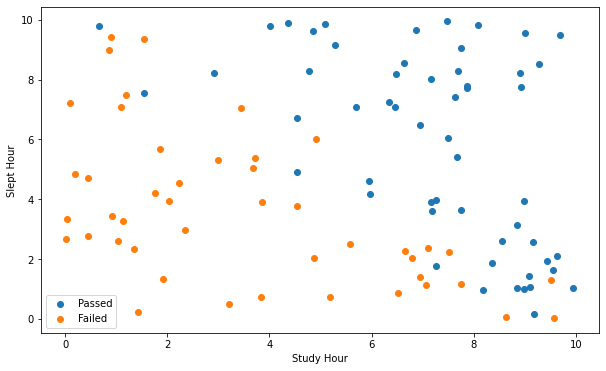

In [0]:
# Visualization
# Split the data to "passed" and "failed"
X1_passed = df[df['Passed'] == 1]['Studied'].to_numpy()
X2_passed = df[df['Passed'] == 1]['Slept'].to_numpy()
X1_failed = df[df['Passed'] == 0]['Studied'].to_numpy()
X2_failed = df[df['Passed'] == 0]['Slept'].to_numpy()

# Plot the data
plt.figure(figsize = (10,6))
plt.scatter(X1_passed, X2_passed, label = 'Passed')
plt.scatter(X1_failed, X2_failed, label = 'Failed')
plt.xlabel('Study Hour')
plt.ylabel('Slept Hour')
plt.legend()
plt.show()

In [0]:
# Create Logistic Regression model that 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Set X and y
X = df[['Studied','Slept']].to_numpy()
y = df['Passed'].to_numpy().reshape(-1,1)

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X, y)

predictions = lg.predict(X)

# Show metrics
print("Mean Squared Error: %f" % mean_squared_error(y, lg.predict(X)))
print("Accuracy Score: %f" % accuracy_score(y, lg.predict(X)))
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

Mean Squared Error: 0.110000
Accuracy Score: 0.890000
Confusion Matrix:
[[39  6]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 2. Logistics Regression From Scratch

### Prediction Model

#### __Linear Equation__
$$ z = b + w_1x_1 + w_2x_2 + ... + w_nx_n$$

- $b$ (or $b_0$): bias (or constant, intercept)
- $w_n$ (or $b_n$): weight (or coefficient)

In [0]:
# Initialize parameters
m = X.shape[0]
n = X.shape[1]
w = np.zeros((n,1))
b = np.zeros((1,1))

# Predictiton
def predict_linear(X, w, b):
  return np.dot(X, w) + b

$$ \sigma(z) = \frac{1} {1 + e^{-z}} $$

* **s(z)** = Sigmoid function to transform our output to a value between 0 and 1 (probability estimate)
* z = output of linear function
* e = base of natural log

In [0]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
# Combine linear regression predictions with sigmoid function:
def predict(X, w, b):
  
    '''
    Returns 1D array of probabilities
    that y equals 1
    '''
    return  1 / (1 + np.exp(-(np.dot(X, w) + b)))

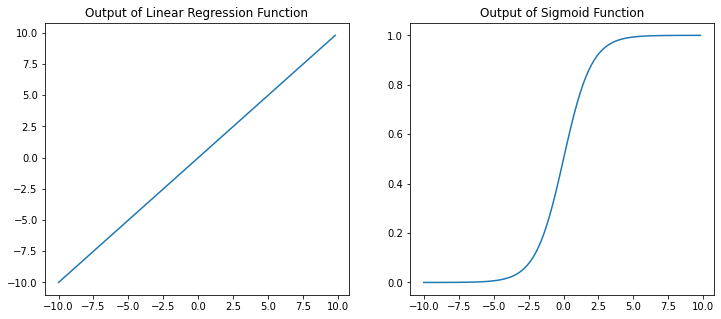

In [0]:
# Visualize sigmoid function and compare with linear regression
def plot_sigmoid(X):
    a = []
    for item in X:
        a.append(sigmoid(item))
    return a

def plot_linear(X):
  a = []
  w = 1
  b = 0
  for item in X:
      a.append(predict_linear(item, w, b))
  return a

X_plot = np.arange(-10., 10., 0.2)
sig = plot_sigmoid(X_plot)
y_linear = plot_linear(X_plot)

plt.subplots(figsize = (12,5))

plt.subplot(121)
plt.plot(X_plot, y_linear)
plt.title('Output of Linear Regression Function')

plt.subplot(122)
plt.plot(X_plot, sig)
plt.title('Output of Sigmoid Function')

plt.show()

* If **s(z)** >= 0.5 then **y_hat** = 1
* If **s(z)** < 0.5 then **y_hat** = 0

In [0]:
# Decision Boundary function
def decision_boundary(a, threshold):
    return 1 if a >= threshold else 0

In [0]:
# Vectorize the Decision Boundary function
def classify(a, threshold):

    global decision_boundary

    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(a, threshold).flatten()

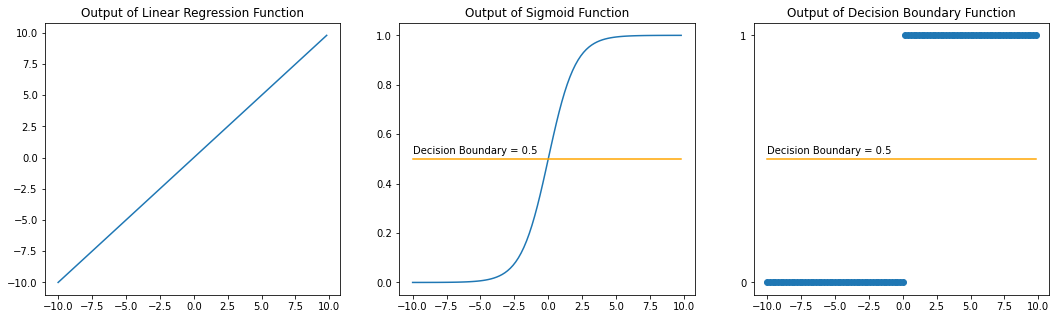

In [0]:
# Visualize classify function

threshold = 0.5 # Adjust this number

sig_bin = classify(sig, threshold)

threshold_plot = np.ones(len(X_plot)) * threshold

plt.subplots(figsize = (18,5))

plt.subplot(131)
plt.plot(X_plot, y_linear)
plt.title('Output of Linear Regression Function')

plt.subplot(132)
plt.plot(X_plot, sig)
plt.plot(X_plot, threshold_plot, c = 'orange')
plt.text(s = 'Decision Boundary = %s' % threshold, x = -10, y = threshold + .02)
plt.title('Output of Sigmoid Function')

plt.subplot(133)
plt.scatter(X_plot, sig_bin)
plt.plot(X_plot, threshold_plot, c = 'orange')
plt.text(s = 'Decision Boundary = %s' % threshold, x = -10, y = threshold + .02)
plt.yticks([0,1])
plt.title('Output of Decision Boundary Function')

plt.show()

#### __Error(Lost) Function: Mean Absolute Error__

![](https://miro.medium.com/max/552/1*6EIZU5RiHx_Um_p-Zuh4Sw.png)
![](https://miro.medium.com/max/552/1*3o9_XoQP4TaceYPRZVHlxg.png)
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a_{i}, y_{i})$$

If **y = 1**:
$$ \mathcal{L}(a_{i}, y_{i}) = -log(a_{i})$$

If **y = 0**:
$$ \mathcal{L}(a{i}, y_{i}) = -log(1-a_{i}) $$

Compress the above two functions into one by multiplying them by **y** and **(y-1)**, resepectively. This way can handle both cases when **x = 1** and **x = 0**.

$$ J(w) = -\frac1m \sum_{i=0}^m[y_{i}log(a_{i}) + (1-y_{i})log(1-a_{i})] $$

* $m$ is the total number of observations (data points)
* $\frac{1}{m} \sum_{i=0}^{m}$ is the mean
* $y_{i}$ is the actual value of an observation and $a_{i}$ is our prediction, i.e. output of the sigmoid function

In [0]:
# Mean Absolute Error
def mae(y, a):
    return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

## Gradient Descent

To minimize our Cost Function, we apply the Gradient Descent algorithm similar to the one we did in Linear Regression:

__Formula:__

- General:
$$\theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J_\theta$$

  - $\theta_j$: parameter ($w$, $b_1$, $b_2$,...$b_n$)
  - $\alpha$: learning rate
  - $J_\theta$: error function with parameter $\theta_j$

__This process is repreated until convergence.__


- Partial Derivative of $b$:

$$ \frac {\partial}{\partial \theta_b}J_\theta = \frac {-1}{m}\sum_{i=1}^{n}(y_i-a_i) $$

- Partial Derivative of $w$

$$ \frac {\partial}{\partial \theta_w}J_\theta = \frac {-1}{m}\sum_{i=1}^{n}x_i(y_i-a_i) $$

<br>

In [0]:
def backward():

    global a, w, b

    db = (-1/m) * np.sum(y - a, keepdims = True)
    dw = (-1/m) * np.dot(X.T, (y - a))

    b = b - (alpha * db)
    w = w - (alpha * dw)

    # Forward Propagation
    a = 1 / (1 + np.exp(-(np.dot(X, w) + b)))
    
    return mae(y, a)

In [0]:
# Test the model

# Initialize parameters
m = X.shape[0]
n = X.shape[1]

w = np.zeros((n, 1))
b = np.zeros((1, 1))
alpha = 0.01
iterations = 10000

a = predict(X, w, b)

# Train the model
for i in range(iterations):
  cost = mae(y, a)
  backward()

  # Print progress
  if i % 1000 == 0:
    print(">> Iteration:",i + 1)
    print("Weights: {}, {} |---| Bias: {} |---| Cost: {}".format(round(w[0,0],4), round(w[1,0],4), round(b[0,0],4) ,round(cost,4)))

>> Iteration: 1
Weights: 0.0118, 0.0082 |---| Bias: 0.0005 |---| Cost: 0.6931
>> Iteration: 1001
Weights: 0.2118, 0.0994 |---| Bias: -1.0251 |---| Cost: 0.5116
>> Iteration: 2001
Weights: 0.286, 0.1678 |---| Bias: -1.8203 |---| Cost: 0.447
>> Iteration: 3001
Weights: 0.3465, 0.2231 |---| Bias: -2.4561 |---| Cost: 0.4057
>> Iteration: 4001
Weights: 0.3974, 0.2692 |---| Bias: -2.9835 |---| Cost: 0.3774
>> Iteration: 5001
Weights: 0.4414, 0.3088 |---| Bias: -3.4343 |---| Cost: 0.3566
>> Iteration: 6001
Weights: 0.4802, 0.3435 |---| Bias: -3.8283 |---| Cost: 0.3408
>> Iteration: 7001
Weights: 0.5149, 0.3746 |---| Bias: -4.1788 |---| Cost: 0.3283
>> Iteration: 8001
Weights: 0.5464, 0.4026 |---| Bias: -4.4949 |---| Cost: 0.3181
>> Iteration: 9001
Weights: 0.5751, 0.4283 |---| Bias: -4.7831 |---| Cost: 0.3097


In [0]:
# Let's wrap everything up!
class LogisticRegression():
  def __init__(self, alpha, iterations, threshold=0.5):
    self.alpha = alpha
    self.iterations = iterations
    self.threshold = threshold

  def fit(self, X, y):
    self.m = X.shape[0]
    self.n = X.shape[1]
    self.w = np.zeros((self.n, 1))
    self.b = np.zeros((1, 1))
    self.X = X
    self.y = y
    self.a = 1 / (1 + np.exp(-(np.dot(self.X, self.w) + self.b))) # Sigmoid function

    for i in range(self.iterations):
      self.backward()

  def mae(self, y, a): # Mean absolute error
    return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

  def backward(self):

    dw = (-1/self.m) * (np.dot(self.X.T, (self.y - self.a))) # Partial derivative with MAE function
    db = (-1/self.m) * np.sum(self.y - self.a, keepdims = True)

    self.w = self.w - (self.alpha * dw)
    self.b = self.b - (self.alpha * db)

    # Forward propagation
    self.a = 1 / (1 + np.exp(-(np.dot(self.X, self.w) + self.b))) # Sigmoid function

    return self.mae(self.y, self.a)

  def predict(self, X):

    a = 1 / (1 + np.exp(-(np.dot(X, self.w) + self.b)))
    
    decision_boundary = np.vectorize(lambda a, threshold: 1 if a >= threshold else 0)  #vectorized decision_boundary function

    return decision_boundary(a, self.threshold).flatten() # Return 1 or 0

### __Test final model__

In [0]:
X = df[['Studied','Slept']].to_numpy()
y = df['Passed'].to_numpy().reshape(-1,1)

In [0]:
# Create model
model = LogisticRegression(alpha = 0.01, iterations = 100000)

# Fit / Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

In [0]:
# Model Accuracy
print("Mean Squared Error: %f" % mean_squared_error(y, predictions))
print("Accuracy Score: %f" % accuracy_score(y, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

Mean Squared Error: 0.110000
Accuracy Score: 0.890000
Confusion Matrix:
[[39  6]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [0]:
# Create Logistic Regression model that 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Set X and y
X = df[['Studied','Slept']].to_numpy()
y = df['Passed'].to_numpy().reshape(-1,1)

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X, y)

predictions = lg.predict(X)

# Show metrics
print("Mean Squared Error: %f" % mean_squared_error(y, lg.predict(X)))
print("Accuracy Score: %f" % accuracy_score(y, lg.predict(X)))
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

Mean Squared Error: 0.110000
Accuracy Score: 0.890000
Confusion Matrix:
[[39  6]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import math
!pip install gradient

# # # Loss function = half-MSE # # #
# # parameters
# y = original values of target variable
# yhat = predicted values of target variable
def loss(y, yhat):
    term1 = [y[i] * math.log(yhat[i]) for i in range(len(y))]
    term2 = [(1 - y[i]) * math.log((1 - yhat[i])) for i in range(len(y))]
    term3 = sum([term1[i] + term2[i] for i in range(len(term1))])
    term4 = -term3/float(len(y))
    return term4

# # # derivative function of intercept # # #
# # parameters
# y = original values of target variable
# yhat = predicted values of target variable
def derivative1(y, yhat):
    d = sum([yhat[i] - y[i] for i in range(len(y))])
    d = d / float(len(y))
    return(d)
# # # derivative function of slopes i.e. theta1, theta2, theta3.... thetaN # # #
# # parameters
# y = original values of target variable
# yhat = predicted values of target variable
# x_n = list of values of nth feature in the data
def derivativeN(y, yhat, x_n):
    d = sum([((yhat[i] - y[i]) * x_n[i]) for i in range(len(y))])
    d = d / float(len(y))
    return(d)

# # # A function that calculates the derivative change with learning rate # # #
# # parameters
# x = list of lists of independent feature values in the data
# y = original values of target variable
# yhat = predicted values of target variable
# params = parameters that needs optimization
# learning_rate = learning_rate to proceed with the gradient
def derivatives(x, y, yhat, params, learning_rate):
    params['intercept'] = round(params['intercept'] - learning_rate * derivative1(y, yhat), 6)
    params['slopes'] = [round(params['slopes'][i] - learning_rate * derivativeN(y, yhat, x[i]), 6) for i in range(len(x))]
    return(params)

# # # A function (sigmoid function) that calculates y value given x and params # # #
# # parameters
# x = list of lists of independent feature values in the data
# params = parameters that needs optimization
def yEQ(x, params):
    mx = [[j * params['slopes'][i] for j in x[i]] for i in range(len(x))]
    mxc = [params['intercept'] + sum(i) for i in zip(*mx)]
    yhat = [(1/ (1 + math.exp(-i))) for i in mxc]
    yhat = [0.9999999999999999 if i == 1.0 else i for i in yhat]
    return yhat

# # import gradient (vanilla_gradient_descent) algorithm
from gradient import vanilla_gradient_descent
# # initializations
# # generate x
x = []
x1 = range(1, 11)
x2 = range(1, 20, 2)
x3 = range(0, 19, 2)
x.append(x1)
x.append(x2)
x.append(x3)
# # formulate original 'y' i.e. y = 1/(1 + exp(-(1 + x1 + 2*x2 + x3)))
slopes = [1, -2, 1]
intercept = 1
y = [round(i) for i in yEQ(x, params = {'intercept' : intercept, 'slopes' : slopes})]
# # run vanilla_gradient_descent
vanilla_gradient_descent(x, y, learning_rate = 0.01, print_every = 1000, threshold = 0.001, iters = 10000000, params = {'slopes' : [0] * len(x), 'intercept' : 0}, derivatives = derivatives, yEQ = yEQ, loss = loss)